In [476]:
import math
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import seaborn.objects

from pyfishsensedev.library.constants import CHECKERBOARD_SQUARE_SIZE_MM

In [477]:
sv_df = pd.read_excel("./data/080323_SV1_Lengths.xls")
fsl_df = pd.read_csv("./data/080323_FSL1_Lengths.csv")

count = 3
std = 4

In [478]:
os.makedirs("./output", exist_ok=True)

In [479]:
sv_sites = {}

for _, sv_row in sv_df.iterrows():
    if math.isnan(sv_row["Length"]):
        continue

    site = sv_row["Site"]
    fish_code = sv_row["FishCode"]
    code = f"{site}/{fish_code}"

    if code not in sv_sites:
        sv_sites[code] = []

    sv_sites[code].append(sv_row["Length"] / 10)

sv_sites = {k:v for k, v in sv_sites.items() if len(v) >= count and np.std(v) <= std}
sv_sites

{'ConchReef/Stoplight05': [33.235556, 38.140897, 34.587325],
 'MolHITW/Hogfish02': [30.887979, 32.230703, 31.073719999999998, 32.015637],
 'SnappLedge/Hogfish01': [31.849856999999997, 34.985879, 25.245171, 32.734892],
 'SnappLedge/BlueParrot02': [29.289314, 22.931745, 31.722066],
 'SnappLedge/BlueParrot04': [33.232194, 26.931554, 34.479835],
 'SnappLedge/Stoplight03': [31.350031, 30.201245, 23.694414000000002],
 'SnappLedge/BlueParrot06': [34.290259, 34.262037, 26.852609],
 'SnappLedge/BlueParrot07': [24.703557, 19.42322, 25.584599]}

In [480]:
list(sv_sites.keys())

['ConchReef/Stoplight05',
 'MolHITW/Hogfish02',
 'SnappLedge/Hogfish01',
 'SnappLedge/BlueParrot02',
 'SnappLedge/BlueParrot04',
 'SnappLedge/Stoplight03',
 'SnappLedge/BlueParrot06',
 'SnappLedge/BlueParrot07']

In [481]:
tg_map = {}

for _, sv_row in sv_df.iterrows():
    if not isinstance(sv_row["TG6_PicNum"], str) or not isinstance(sv_row["Site"], str):
        continue

    site = sv_row["Site"]
    fish_code = sv_row["FishCode"]

    parts = [p.strip() for p in sv_row["TG6_PicNum"].split(";")]

    for part in parts:
        if "-" in part:
            first = int(part.split("-")[0].strip())
            last = int(part.split("-")[1].strip())

            for i in range(first, last + 1):
                tg_map[i] = (site, fish_code)
        else:
            tg_map[int(part)] = (site, fish_code)

tg_map

{8030201: ('ConchReef', 'Hogfish01'),
 8030202: ('ConchReef', 'Hogfish01'),
 8030203: ('ConchReef', 'Hogfish01'),
 8030204: ('ConchReef', 'Hogfish01'),
 8030205: ('ConchReef', 'Hogfish01'),
 8030206: ('ConchReef', 'Stoplight01'),
 8030207: ('ConchReef', 'Stoplight01'),
 8030208: ('ConchReef', 'Stoplight01'),
 8030209: ('ConchReef', 'Hogfish02'),
 8030210: ('ConchReef', 'Hogfish02'),
 8030211: ('ConchReef', 'Hogfish02'),
 8030212: ('ConchReef', 'Hogfish02'),
 8030213: ('ConchReef', 'Hogfish02'),
 8030214: ('ConchReef', 'Hogfish02'),
 8030215: ('ConchReef', 'Hogfish02'),
 8030216: ('ConchReef', 'Hogfish02'),
 8030219: ('ConchReef', 'RainbowParrot02'),
 8030220: ('ConchReef', 'RainbowParrot02'),
 8030221: ('ConchReef', 'RainbowParrot02'),
 8030222: ('ConchReef', 'RainbowParrot02'),
 8030223: ('ConchReef', 'RainbowParrot02'),
 8030224: ('ConchReef', 'RainbowParrot02'),
 8030225: ('ConchReef', 'RainbowParrot02'),
 8030226: ('ConchReef', 'RainbowParrot02'),
 8030227: ('ConchReef', 'RainbowPa

In [482]:
fsl_sites = {}

for _, fsl_row in fsl_df.iterrows():
    path = Path(fsl_row["file"])
    tg_num = int(path.parts[-1][1:-4])

    if tg_num not in tg_map:
        continue

    site, fish_code = tg_map[tg_num]
    code = f"{site}/{fish_code}"

    if code not in sv_sites:
        continue

    if code not in fsl_sites:
        fsl_sites[code] = []

    fsl_sites[code].append(fsl_row["length"] * 100)

fsl_sites = {k:v for k, v in fsl_sites.items() if len(v) >= count and np.std(v) <= std}
fsl_sites

{'SnappLedge/Hogfish01': [29.3527449,
  28.5496402,
  28.5589362,
  27.733578599999998,
  35.1520137,
  34.61251,
  35.0925869,
  31.049519399999998,
  28.756785299999997,
  32.8028604,
  34.495073999999995,
  33.808160799999996,
  34.4317814,
  32.4910829,
  32.6368687],
 'SnappLedge/BlueParrot02': [26.8325994, 25.7153243, 27.236308799999996],
 'SnappLedge/Stoplight03': [25.1485733,
  25.728947899999998,
  29.8114573,
  29.7421607,
  25.606323399999997,
  26.3782837,
  26.9814179,
  27.4678775,
  28.297950399999998,
  29.332514500000002,
  21.1125476,
  20.0274094]}

In [483]:
list(fsl_sites.keys())

['SnappLedge/Hogfish01', 'SnappLedge/BlueParrot02', 'SnappLedge/Stoplight03']

In [484]:
sv_sites = {k:v for k, v in sv_sites.items() if k in fsl_sites}
sv_sites

{'SnappLedge/Hogfish01': [31.849856999999997, 34.985879, 25.245171, 32.734892],
 'SnappLedge/BlueParrot02': [29.289314, 22.931745, 31.722066],
 'SnappLedge/Stoplight03': [31.350031, 30.201245, 23.694414000000002]}

In [485]:
len(sv_sites), len(fsl_sites)

(3, 3)

In [486]:
sv = [[k, i, "Stereo Video"] for k, v in sv_sites.items() for i in v]
sv

[['SnappLedge/Hogfish01', 31.849856999999997, 'Stereo Video'],
 ['SnappLedge/Hogfish01', 34.985879, 'Stereo Video'],
 ['SnappLedge/Hogfish01', 25.245171, 'Stereo Video'],
 ['SnappLedge/Hogfish01', 32.734892, 'Stereo Video'],
 ['SnappLedge/BlueParrot02', 29.289314, 'Stereo Video'],
 ['SnappLedge/BlueParrot02', 22.931745, 'Stereo Video'],
 ['SnappLedge/BlueParrot02', 31.722066, 'Stereo Video'],
 ['SnappLedge/Stoplight03', 31.350031, 'Stereo Video'],
 ['SnappLedge/Stoplight03', 30.201245, 'Stereo Video'],
 ['SnappLedge/Stoplight03', 23.694414000000002, 'Stereo Video']]

In [487]:
fsl = [[k, i, "FishSense Lite"] for k, v in fsl_sites.items() for i in v]
fsl

[['SnappLedge/Hogfish01', 29.3527449, 'FishSense Lite'],
 ['SnappLedge/Hogfish01', 28.5496402, 'FishSense Lite'],
 ['SnappLedge/Hogfish01', 28.5589362, 'FishSense Lite'],
 ['SnappLedge/Hogfish01', 27.733578599999998, 'FishSense Lite'],
 ['SnappLedge/Hogfish01', 35.1520137, 'FishSense Lite'],
 ['SnappLedge/Hogfish01', 34.61251, 'FishSense Lite'],
 ['SnappLedge/Hogfish01', 35.0925869, 'FishSense Lite'],
 ['SnappLedge/Hogfish01', 31.049519399999998, 'FishSense Lite'],
 ['SnappLedge/Hogfish01', 28.756785299999997, 'FishSense Lite'],
 ['SnappLedge/Hogfish01', 32.8028604, 'FishSense Lite'],
 ['SnappLedge/Hogfish01', 34.495073999999995, 'FishSense Lite'],
 ['SnappLedge/Hogfish01', 33.808160799999996, 'FishSense Lite'],
 ['SnappLedge/Hogfish01', 34.4317814, 'FishSense Lite'],
 ['SnappLedge/Hogfish01', 32.4910829, 'FishSense Lite'],
 ['SnappLedge/Hogfish01', 32.6368687, 'FishSense Lite'],
 ['SnappLedge/BlueParrot02', 26.8325994, 'FishSense Lite'],
 ['SnappLedge/BlueParrot02', 25.7153243, 'FishS

In [488]:
#sv_fsl_df = pd.DataFrame(sv + fsl, columns=["Fish", "Length (cm)", "Camera"])
sv_fsl_df = pd.DataFrame([[i[0].split("/")[1], i[1], i[2]] for i in sv + fsl], columns=["Fish", "Length (cm)", "Camera"])
sv_fsl_df

,Fish,Length (cm),Camera
0,Hogfish01,31.849857,Stereo Video
1,Hogfish01,34.985879,Stereo Video
2,Hogfish01,25.245171,Stereo Video
3,Hogfish01,32.734892,Stereo Video
4,BlueParrot02,29.289314,Stereo Video
5,BlueParrot02,22.931745,Stereo Video
6,BlueParrot02,31.722066,Stereo Video
7,Stoplight03,31.350031,Stereo Video
8,Stoplight03,30.201245,Stereo Video
9,Stoplight03,23.694414,Stereo Video


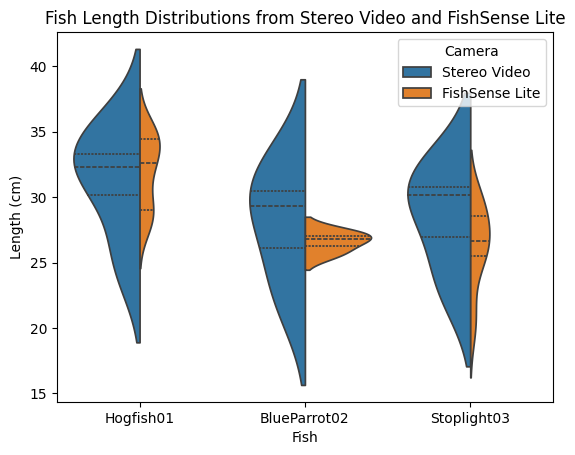

In [495]:
fig, ax = plt.subplots()#figsize=(12,7))
a = sns.violinplot(data=sv_fsl_df, x="Fish", y="Length (cm)", hue="Camera", split=True, inner="quart", ax=ax)
# a.set_xticklabels(a.get_xticklabels(), rotation=45)
a.set_title("Fish Length Distributions from Stereo Video and FishSense Lite")
# ax.grid()

fig.savefig("./output/fishlength_violin.pdf")

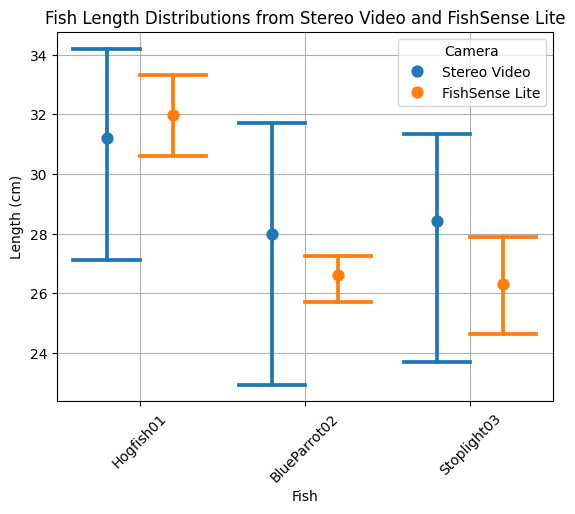

In [490]:
sns.pointplot(data=sv_fsl_df, x="Fish", y="Length (cm)", hue="Camera", linestyle="none", capsize=.4, dodge=.4)
plt.xticks(rotation=45)
plt.title("Fish Length Distributions from Stereo Video and FishSense Lite")
plt.grid()

In [491]:
rot_csv = pd.read_csv("./data/checkerboard_locations_rotations.csv")
rot_csv

,Unnamed: 0,distance,length1,length2,length3,length4,length5,length6,length7,length8,...,abs_error_9,perc_error_9,abs_error_10,perc_error_10,abs_error_11,perc_error_11,abs_error_12,perc_error_12,abs_error_13,perc_error_13
0,0,0.826231,0.042724,0.084920,0.126689,0.168183,0.209171,0.249742,0.289934,0.329714,...,0.002567,0.006906,0.004856,0.011757,0.007597,0.016722,0.010756,0.021704,0.014050,0.026168
1,1,1.210364,0.042709,0.085201,0.127642,0.169930,0.211991,0.253945,0.295808,0.337581,...,0.007300,0.019638,0.007350,0.017796,0.007324,0.016121,0.007108,0.014342,0.006607,0.012307
2,2,1.416354,0.042365,0.084722,0.126950,0.168952,0.210872,0.252668,0.294322,0.336060,...,0.005657,0.015219,0.005699,0.013798,0.005608,0.012345,0.005396,0.010887,0.004964,0.009246
3,3,1.792627,0.042594,0.085139,0.127518,0.169396,0.211497,0.253429,0.295277,0.337078,...,0.006707,0.018043,0.006734,0.016305,0.006705,0.014758,0.006400,0.012915,0.005967,0.011113
4,4,2.272012,0.042537,0.085127,0.127539,0.169850,0.211844,0.253987,0.295766,0.337480,...,0.007711,0.020744,0.007871,0.019059,0.008148,0.017935,0.008296,0.016738,0.008133,0.015148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,178,2.456589,0.038180,0.076771,0.115546,0.154226,0.193529,0.232749,0.272365,0.312412,...,0.019167,0.051565,0.020088,0.048639,0.020890,0.045982,0.021351,0.043082,0.021688,0.040395
179,179,2.305764,0.038645,0.077235,0.115697,0.154608,0.193837,0.233201,0.272792,0.312640,...,0.019236,0.051752,0.020239,0.049006,0.021475,0.047271,0.021964,0.044317,0.022615,0.042122
180,180,1.715207,0.038779,0.077702,0.117160,0.156670,0.196770,0.236879,0.277185,0.318168,...,0.012456,0.033512,0.012226,0.029604,0.011859,0.026104,0.011179,0.022556,0.010338,0.019255
181,181,1.438318,0.039045,0.078506,0.118383,0.158501,0.198857,0.239714,0.280824,0.322176,...,0.007885,0.021212,0.006836,0.016551,0.005973,0.013149,0.004327,0.008730,0.002573,0.004793


In [492]:
rot_data = []

for _, row in rot_csv.iterrows():
    if row["yaw_deg"] > 15:
        continue

    for i in range(1, 9):
        label = f"length{i}"
        real_length_cm = round(CHECKERBOARD_SQUARE_SIZE_MM * i) / 10
        measure_length_cm = row[label] * 100
        perc_error = abs(real_length_cm - measure_length_cm) / real_length_cm * 100

        rot_data.append([perc_error, real_length_cm])

rot_data

[[4.204060306476343, 4.1],
 [2.313472847156855, 8.3],
 [2.1685309737114484, 12.4],
 [1.9292775297521838, 16.5],
 [1.5395264115936316, 20.6],
 [0.7025257624547145, 24.8],
 [0.3232088785177229, 28.9],
 [0.08673063969251699, 33.0],
 [4.168485943477082, 4.1],
 [2.651544038141561, 8.3],
 [2.937266300577005, 12.4],
 [2.9876070916289685, 16.5],
 [2.9082625574847407, 20.6],
 [2.397101738978049, 24.8],
 [2.3557750274002776, 28.9],
 [2.2972128551953808, 33.0],
 [3.329980346285129, 4.1],
 [2.0746213349261176, 8.3],
 [2.3787053464974086, 12.4],
 [2.395140993200415, 16.5],
 [2.3650688534892184, 20.6],
 [1.8821780534944468, 24.8],
 [1.841647408071527, 28.9],
 [1.836343578148835, 33.0],
 [3.8880188110707503, 4.1],
 [2.576739367615531, 8.3],
 [2.8374715818611236, 12.4],
 [2.6640416816016974, 16.5],
 [2.668303643367464, 20.6],
 [2.1889979389553997, 24.8],
 [2.1719956343721845, 28.9],
 [2.1448596273993368, 33.0],
 [3.74859847363318, 4.1],
 [2.5624217931648223, 8.3],
 [2.8537661598291795, 12.4],
 [2.9392

In [493]:
rot_df = pd.DataFrame(rot_data, columns=[
    "Percent Error",
    "Length (cm)"
])

rot_df

,Percent Error,Length (cm)
0,4.204060,4.1
1,2.313473,8.3
2,2.168531,12.4
3,1.929278,16.5
4,1.539526,20.6
...,...,...
779,3.881584,16.5
780,3.348040,20.6
781,3.212636,24.8
782,2.724721,28.9


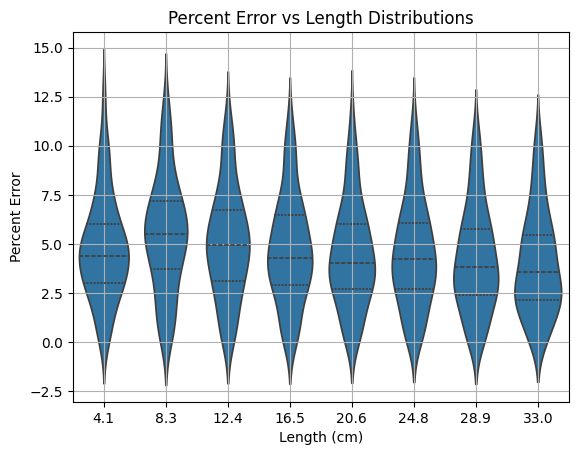

In [494]:
fig, ax = plt.subplots() #figsize=(12,7))
g = sns.violinplot(data=rot_df, x="Length (cm)", y="Percent Error", inner="quart", ax=ax)

ax.grid()
ax.set_title("Percent Error vs Length Distributions")

fig.savefig("./output/checkerboard_length.pdf")